In [3]:
import numpy as np
from sklearn import datasets
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
import random
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

In [4]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

colors=['green','skyblue', 'navy']

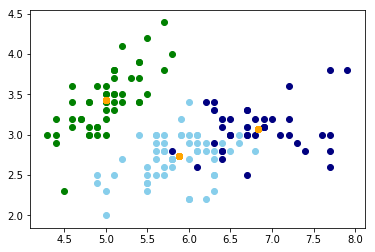

In [5]:
# K-Means avec centroïdes définis de façon random
def k_means_rand(X, k):
    
    M = X.shape[1]
    N = X.shape[0]
    distances = np.empty(k)
    labels = np.zeros(N, dtype = int)
    centroids = np.empty([k, M])
    
    # initialisation des centres
    for i in range (0, k):
        centroids[i] = random.choices(X, k=1)[0]
    
    # s ici est choisi arbitrairement, c'est le nombre de fois que l'on va recalculer le cout et les centres 
    for s in range (0, 10):
        
        #calcul des distances - attribution des labels aux données
        for i in range (0, N):
            for j in range (0, k):
                distances[j] = euclidean_distances([X[i]], [centroids[j]])
            labels[i] = np.argmin(distances)

        nb_x = np.zeros(k)
        new_centroids = np.zeros([k, M])

        #on calcule les nouveaux centroides en faisant une moyenne des donnees de chaque cluster
        for i in range (0, N):
            nb_x[labels[i]] += 1
            new_centroids[labels[i]] += X[i]  
        
        for i in range(0, k):
            if nb_x[i] != 0:
                centroids[i] = new_centroids[i]/float(nb_x[i])   
                
    return labels,centroids
    

labels,centroids = k_means_rand(X, 3)
for i in range(0, X.shape[0]):

  plt.scatter(X[i][0], X[i][1], c=colors[labels[i]%len(colors)])
  plt.scatter(centroids[:,0],centroids[:,1],marker = 'o',c='orange')

plt.show()

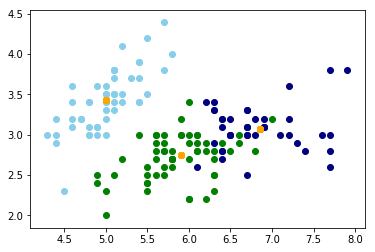

In [519]:
# K-Means avec centroïdes définis avec la méthode K-means++
def k_means_plus(X, k):
    
    M = X.shape[1]
    N = X.shape[0]
    centroids = np.empty([k, M])
    distances = np.empty(k)
    labels = np.zeros(N, dtype = int)
    
    # initialisation des centres
    centroids = KMeans(n_clusters=k,max_iter=1).fit(X).cluster_centers_
    
    # s ici est choisi arbitrairement, c'est le nombre de fois que l'on va recalculer le cout et les centres
    for s in range (0, 5):
        
        #calcul des distances - atribution des labels aux données
        for i in range (0, N):
            for j in range (0, k):
                distances[j] = euclidean_distances([X[i]], [centroids[j]])
            labels[i] = np.argmin(distances)

        nb_x = np.zeros(k)
        new_centroids = np.zeros([k, M])

        #on calcule les nouveaux centroides en faisant une moyenne des donnees de chaque cluster
        for i in range (0, N):
            nb_x[labels[i]] += 1
            new_centroids[labels[i]] += X[i]       

        for i in range(0, k):
            if nb_x[i] != 0:
                centroids[i] = new_centroids[i]/float(nb_x[i])

    return labels,centroids
  
    
labels,centroids = k_means_plus(X, 3)
for i in range(0, X.shape[0]):

  plt.scatter(X[i][0], X[i][1], c=colors[labels[i]%len(colors)])
  plt.scatter(centroids[:,0],centroids[:,1],marker = 'o',c='orange')

plt.show()

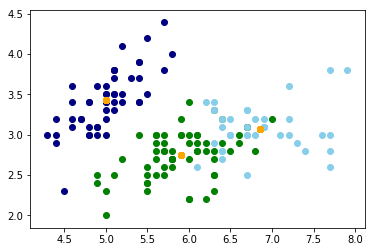

In [613]:
# K-Means avec le premier centroide defini aléatoirement et les k-1 restants - 
# les données les plus proches du premier centroïde
def k_means_closest(X, k):
    
    M = X.shape[1]
    N = X.shape[0]
    centroids = np.empty([k, M])
    dtype = [('index', int), ('distance', float)]
    centr = np.empty(N, dtype=dtype)
    distances = np.empty(k)
    labels = np.zeros(N, dtype = int)
    
    # initialisation des centres
    centroids[0] = random.choices(X, k=1)[0]
    
    #calcul des distances - atribution des labels aux données
    for i in range (0, N):
        centr[i] = (i, euclidean_distances([X[i]], [centroids[0]]))
    centr = np.sort(centr, order='distance')
        
    for i in range (1, k):  
        centroids[i] = X[(centr['index'][i])]

    # s ici est choisi arbitrairement, c'est le nombre de fois que l'on va recalculer le cout et les centres
    for s in range (0, 10):
        
        for i in range (0, N):
            for j in range (0, k):
                distances[j] = euclidean_distances([X[i]], [centroids[j]])
            labels[i] = np.argmin(distances)

        nb_x = np.zeros(k)
        new_centroids = np.zeros([k, M])

        #on calcule les nouveaux centroides en faisant une moyenne des donnees de chaque cluster
        for i in range (0, N):
            nb_x[labels[i]] += 1
            new_centroids[labels[i]] += X[i]       

        for i in range(0, k):
            if nb_x[i] != 0:
                centroids[i] = new_centroids[i]/float(nb_x[i])  
    return labels,centroids
        
       
labels,centroids = k_means_closest(X, 3)
for i in range(0, X.shape[0]):

  plt.scatter(X[i][0], X[i][1], c=colors[labels[i]%len(colors)])
  plt.scatter(centroids[:,0],centroids[:,1],marker = 'o',c='orange')

plt.show()

In [655]:
# J'ai essayé ici d'utiliser l'indice de Davies Bouldin pour comparer l'efficacité des differentes manières
# de définir les centroïdes dans K-means. Finalement, toutes les méthodes semblent être efficaces après un
# certain nombre d'itérations.

labels,centroids = k_means_rand(X, 3)
print("random: ", davies_bouldin_score(X, labels))

labels,centroids = k_means_plus(X, 3)
print("K++: ", davies_bouldin_score(X, labels))

labels,centroids = k_means_closest(X, 3)
print("K closest: ", davies_bouldin_score(X, labels))

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


random:  0.6660385791628485


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


random:  0.6660385791628485


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


random:  0.6692465823103232


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


K++:  0.6619715465007486
K closest:  0.6619715465007486


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [638]:
# Test - indice de Silhouette de K-means avec k=3
for i in range(0,5):
    
    labels,centroids = k_means_rand(X, 3)
    print("i = ", i, ": ", silhouette_score (X,labels, metric='euclidean'))

i =  0 :  0.5511916046195915
i =  1 :  0.5511916046195915
i =  2 :  0.51227188549612
i =  3 :  0.5185675688773274
i =  4 :  0.5495175126471614


In [639]:
# Test - indice de Silhouette de K-means avec k=2
for i in range(0,5):
    
    labels,centroids = k_means_rand(X, 2)
    print("i = ", i, ": ", silhouette_score (X,labels, metric='euclidean'))

i =  0 :  0.6810461692117459
i =  1 :  0.6810461692117459
i =  2 :  0.6810461692117459
i =  3 :  0.6810461692117459
i =  4 :  0.6810461692117459


In [640]:
# Test - indice de Silhouette de K-means avec k=5
for i in range(0,5):
    
    labels,centroids = k_means_rand(X, 5)
    print("i = ", i, ": ", silhouette_score (X,labels, metric='euclidean'))

i =  0 :  0.3726790261231237
i =  1 :  0.4939444414814313
i =  2 :  0.36721493482324763
i =  3 :  0.3640626192643992
i =  4 :  0.38083037012132337


cost :  160.57822052175433
new cost :  157.7406080183027
new cost :  156.17458245239138
new cost :  155.5065529878628
new cost :  155.4154619095835
new cost :  155.07956716776513
new cost :  154.79829518828717
new cost :  154.68331128930066
new cost :  136.85326402141044
new cost :  116.23140691398909
new cost :  113.96575110277601
new cost :  107.71686795920242
new cost :  107.58526715298075
new cost :  105.41332512459674
new cost :  103.8239756504982
score : 0.5497648973752719


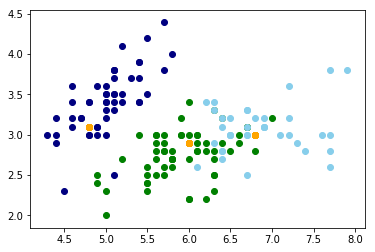

In [645]:
# K-medoids avec medoids randoms
def k_medoids(X, k):
    
    M = X.shape[1]
    N = X.shape[0]
    medoids = np.empty([k, M])
    distances = np.empty(k)
    labels = np.zeros(N, dtype=int)
    prev_sum = 0
    dist_sum = 0
    tmp = np.empty([1,M])
    
    # initialisation des centres
    for i in range (0, k):
        medoids[i] = random.choices(X, k=1)[0]
    
    #calcul des distances - attribution des labels aux données
    for i in range (0, N):
        for j in range (0, k):
            distances[j] = euclidean_distances([X[i]], [medoids[j]])
        labels[i] = np.argmin(distances)
        prev_sum += np.min(distances)
    print("cost : ", prev_sum)
    
    # on essaye de remplacer un par un chaque medoid par chaque X[i]
    for i in range (0, N):
        for j in range (0, k):
            tmp = np.copy(medoids[j])
            medoids[j] = np.copy(X[i])
            
            
            # on recalcule l'hypotetique somme des distances de chaque point a son medoide le plus proche
            for u in range (0, N):
                for w in range (0, k):
                    distances[w] = euclidean_distances([X[u]], [medoids[w]])
                dist_sum += np.min(distances)
        
            
            # si la somme a diminué, on remplace effectivement le medoide par X[i]
            if dist_sum < prev_sum:
                print("new cost : ", dist_sum)
                prev_sum = dist_sum
                dist_sum = 0
                
            
            # sinon on re-swap
            else:
                medoids[j] = tmp
                dist_sum = 0

    # on attribue des nouveaux labels aux données en utilisant les medoides recalculés
    for i in range (0, N):
        for j in range (0, k):
            distances[j] = euclidean_distances([X[i]], [medoids[j]])
        labels[i] = np.argmin(distances)
        
    return labels,medoids
  
    
labels,centroids = k_medoids(X, 3)

print("score :", silhouette_score (X,labels, metric='euclidean'))

for i in range(0, X.shape[0]):

  plt.scatter(X[i][0], X[i][1], c=colors[labels[i]%len(colors)])
  plt.scatter(centroids[:,0],centroids[:,1],marker = 'o',c='orange')
    
plt.show()


cost :  127.94433342711947
new cost :  126.34963762464778
new cost :  126.31176619596998
new cost :  126.23069037434072
new cost :  126.03284803537797
new cost :  123.91575954073214
new cost :  111.3480264210891
new cost :  110.3960721075945
new cost :  109.2419807924887
new cost :  107.21545775126793
new cost :  106.84643288865664
new cost :  106.26759162194602
new cost :  105.74074736422949
new cost :  105.55054453182657
new cost :  104.37196727890182
new cost :  104.32421959178052
new cost :  103.78339325644735
new cost :  102.95823606037568
new cost :  101.24051729247071
new cost :  101.18870575659585
new cost :  100.65772817344288
score : 0.520198401310698


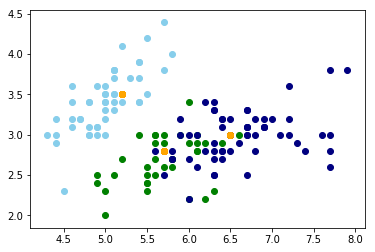

In [656]:
# K-Medoids avec centroïdes définis avec la méthode K-means++
def k_medoids_plus(X, k):
    
    M = X.shape[1]
    N = X.shape[0]
    medoids = np.empty([k, M])
    distances = np.empty(k)
    labels = np.zeros(N, dtype=int)
    prev_sum = 0
    dist_sum = 0
    tmp = np.empty([1,M])
    
    # initialisation des centres
    medoids = KMeans(n_clusters=k,max_iter=1).fit(X).cluster_centers_
    
    for i in range (0, N):
        for j in range (0, k):
            distances[j] = euclidean_distances([X[i]], [medoids[j]])
        labels[i] = np.argmin(distances)
        prev_sum += np.min(distances)
    
    for i in range (0, N):
        for j in range (0, k):
            tmp = np.copy(medoids[j])
            medoids[j] = np.copy(X[i])
            # somme de toutes les distances
            for u in range (0, N):
                for w in range (0, k):
                    distances[w] = euclidean_distances([X[u]], [medoids[w]])
                dist_sum += np.min(distances)
            
        
            
            # si la somme a diminué
            if dist_sum < prev_sum:
                print("cost : ", dist_sum)
                prev_sum = dist_sum
                dist_sum = 0
                
            
            # sinon
            else:
                medoids[j] = tmp
                dist_sum = 0

    for i in range (0, N):
        for j in range (0, k):
            distances[j] = euclidean_distances([X[i]], [medoids[j]])
        labels[i] = np.argmin(distances)
        
    return labels,medoids
  
    
labels,centroids = k_medoids(X, 3)

print("score :", silhouette_score (X,labels, metric='euclidean'))

for i in range(0, X.shape[0]):

  plt.scatter(X[i][0], X[i][1], c=colors[labels[i]%len(colors)])
  plt.scatter(centroids[:,0],centroids[:,1],marker = 'o',c='orange')
    
plt.show()

In [579]:
# Test - indice de Silhouette de K-medoïds avec k=3
for i in range(0,5):
    
    labels,centroids = k_medoids(X, 3)
    print("i = ", i, ": ", silhouette_score (X,labels, metric='euclidean'))

i =  0 :  0.520198401310698
i =  1 :  0.520198401310698
i =  2 :  0.520198401310698
i =  3 :  0.520198401310698
i =  4 :  0.520198401310698


In [538]:
# Test - indice de Silhouette de K-medoïds avec k=5
for i in range(0,5):
    
    labels,centroids = k_medoids(X, 5)
    print("i = ", i, ": ", silhouette_score (X,labels, metric='euclidean'))

i =  0 :  0.4867481112818122
i =  1 :  0.42061971731043174
i =  2 :  0.3682310718293418
i =  3 :  0.4573549584186393
i =  4 :  0.36134747092920527


In [539]:
# Test - indice de Silhouette de K-medoïds avec k=2
for i in range(0,5):
    
    labels,centroids = k_medoids(X, 2)
    print("i = ", i, ": ", silhouette_score (X,labels, metric='euclidean'))

i =  0 :  0.6857881712617189
i =  1 :  0.6857881712617189
i =  2 :  0.6857881712617189
i =  3 :  0.6857881712617189
i =  4 :  0.6857881712617189


In [ ]:
# La methode K-medoids semble être un peu plus stable que K-means, mais plus le nombre de clusters est grand,
# plus les deux algorithmes ont du mal à classifier les données (et vis versa). 
# L'avantage évident de K-means est sa rapidité: on a une complexité de O(n*k) contre O(n2*k2) de K-medoids.

# Utiliser la méthode K-means++ n'est pas nécessaire dans ces algorithmes: que ce soit pour K-means ou pour
# K-medoids, les résultats tournent autour des mêmes valeurs peu importe la manière d'initialiser les centres.